# Torchvision

## torchvision.datasets

In [1]:
import torchvision

mnist_dataset = torchvision.datasets.MNIST(root='./data/',          # 数据集位置
                                           train=True,              # True-只加载训练数据；False-只加载测试数据集
                                           transform=None,          # 对图像进行预处理操作
                                           target_transform=None,   # 对图像标签进行预处理操作
                                           download=True)           # 是否下载
mnist_dataset_list = list(mnist_dataset)
print(mnist_dataset_list[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x5F11CA0>, 5)


In [2]:
display(mnist_dataset_list[1][0])       # 显示 PIL.Image.Image 类型的图像
print("Image label is:",mnist_dataset_list[1][1])   # 图像对应的标签

Image label is: 0


## torchvision.transforms

### 1.数据类型转换

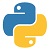

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=50x50 at 0x1A30CB50>


In [41]:
from PIL import Image
from torchvision import transforms

img = Image.open('./data/img/pylogo.jpg')
display(img)
print(type(img))
print(img)

PIL.Image 转为 Tensor

In [43]:
tensor1 = transforms.ToTensor()(img)
print(type(tensor1))
print(tensor1.shape) # 3 通道，50 *50 像素
print(tensor1)

<class 'torch.Tensor'>
torch.Size([3, 50, 50])
tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.9882, 0.9961, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
         [0.9961, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.9922, 0.9922, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.9569, 0.9647, 0.9843,  ..., 0.9843, 0.9922, 1.0000],
         [0.9725, 0.9804, 0.9922,  ..., 0.9843, 0.9922, 1.0000],
         [1

Tensor 转为 PIL.Image

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=50x50 at 0x2124D9D0>


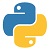

In [5]:
img1 = transforms.ToPILImage()(tensor1)
print(type(img1))
print(img1)
display(img1)

### 2.图片操作

调整大小

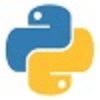

In [6]:
# 定义一个 Resize 操作
resize_img_oper = transforms.Resize((100, 100), interpolation=2)

img2 = resize_img_oper(img)
display(img2)

裁剪

In [7]:
# 中心裁剪
center_crop_oper = transforms.CenterCrop((30,30))
display(center_crop_oper(img))

In [8]:
# 随机裁剪
random_crop_oper = transforms.RandomCrop((30,30))
display(random_crop_oper(img))

In [9]:
# 四角和中心裁剪
five_crop_oper = transforms.FiveCrop((20,20))
imgs = five_crop_oper(img)
for i in imgs:
    display(i)

翻转

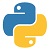

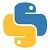

In [10]:
# 以 p 概率进行水平翻转
h_flip_oper = transforms.RandomHorizontalFlip(p=1)
display(img)
display(h_flip_oper(img))

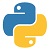

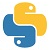

In [11]:
# 以 p 概率进行垂直翻转
v_flip_oper = transforms.RandomVerticalFlip(p=1)
display(img)
display(v_flip_oper(img))

### 3.Tensor 操作

标准化

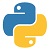

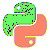

In [12]:
norm_oper = transforms.Normalize(mean=(0.5, 0.5, 0.5),      # 表示各通道的均值
                                 std=(0.5, 0.5, 0.5),       # 表示个通道的标准差
                                 inplace=False)             # 是否原地操作

tensor1 = transforms.ToTensor()(img)
# 标准化
tensor_norm = norm_oper(tensor1)
# 转为图像
img_norm = transforms.ToPILImage()(tensor_norm)
display(img)
display(img_norm)


变换的组合

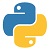

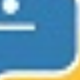

In [13]:
# 定义组合操作

composed = transforms.Compose(
    [transforms.Resize((200, 200)),     # 修改图片像素
     transforms.RandomCrop(80)])        # 随机裁剪

composed_img = composed(img)
display(img)
display(composed_img)


### 4.结合 datasets 使用

将 PIL.Image.Image 类型转换为 tensor

In [14]:
my_transrform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5), (0.5))])

# 读取 MNIST 数据集，同时做数据变换
mnist_dataset = torchvision.datasets.MNIST(root='./data/',              # 数据集位置
                                           train=False,                 # True-只加载训练数据；False-只加载测试数据集
                                           transform=my_transrform,     # 对图像进行预处理操作
                                           target_transform=None,       # 对图像标签进行预处理操作
                                           download=False)              # 是否下载
item = mnist_dataset.__getitem__(0)
print(type(item[0]))
mnist_dataset_list = list(mnist_dataset)
print(mnist_dataset_list[0])

<class 'torch.Tensor'>
(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.00

## torchvision.models

In [6]:
# 使用随机初始化的权重，创建一个 GoogLeNet 模型，需要经过训练后才能用于预测
import torchvision.models as models

googlenet = models.googlenet()

In [22]:
import torch
import torchvision.models as models

# 直接导入训练好的模型来使用
googlenet = models.googlenet(pretrained=True)
print(googlenet.fc)
# 提取分类层的输入参数
fc_in_features = googlenet.fc.in_features
print('fc_in_features:', fc_in_features)

# 查看分类层的输出参数
fc_out_features = googlenet.fc.out_features
print('fc_out_features:', fc_out_features)

# 修改与训练模型的输出分类数
googlenet.fc = torch.nn.Linear(fc_in_features, 10)
print(googlenet.fc)

Linear(in_features=1024, out_features=1000, bias=True)
fc_in_features: 1024
fc_out_features: 1000
Linear(in_features=1024, out_features=10, bias=True)


## torchvision.utils

make_grid

torch.Size([32, 1, 28, 28])


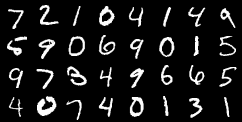

In [35]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

# 加载 MNIST 数据集
mnist_dataset = torchvision.datasets.MNIST(root='./data/',          # 数据集位置
                                           train=False,              # True-只加载训练数据；False-只加载测试数据集
                                           transform=transforms.ToTensor(),          # 对图像进行预处理操作
                                           target_transform=None,   # 对图像标签进行预处理操作
                                           download=True)           # 是否下载

tensor_dataloader = DataLoader(dataset=mnist_dataset, batch_size=32)

data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = next(data_iter)
print(img_tensor.shape)

# 将 32 张图片拼接在一个网格中
grid_tensor = torchvision.utils.make_grid(img_tensor,   # 类型是 Tensor 或列表，如果是 Tensor,形状应是(B*C*H*W)
                                          nrow=8,       # 一行放入的图片数量
                                          padding=2)    # 子图像之间的边框宽度，默认 2 像素
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)


save_img

In [39]:
# 输入为 1 张图片
torchvision.utils.save_image(grid_tensor, './data/img/grid.jpg')
# 输入多张图片，默认进行拼接
torchvision.utils.save_image(img_tensor, './data/img/grid2.jpg', nrow=5, padding=2)
